# Imbalanced learning
Artur Back de Luca

GEIA - Grupo de estudos em Inteligência Aritificial

## Content:

- Defintion
- Context
- Problematic
- Approaches:
    1. Problem based approaches
    2. Data based approaches
    3. Algorithm based approaches
- Example

### Imbalanced datasets

&ensp;&ensp;&ensp;&ensp;
_An unequal proportion of class examples_

## Context

Several real world problems involve some sort of class imbalance


<ol>
    <li><b>Banking:</b> Fraud detection (there are less fraudulent than authentic transactions)</li>
    <li><b>Health:</b> Disease detection (rare conditions)</li>
    <li><b>Manufacturing:</b> Flaw detection (e.g. failed welded joint in product)</li>
</ol>
<br><br><br><br>

<p style="font-size:0.8em; text-align:right">
<a href="https://pdfs.semanticscholar.org/6e19/3366945bf3bd72d5ba906e3982ac4d8ae874.pdf">[1]</a>    : Chan, P., & Stolfo, S. (2001). Toward scalable learning with non-uniform class and cost distributions: A case study in credit card fraud detection<br>
<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3163175/pdf/1472-6947-11-51.pdf">[2]</a>: Khalilia, M., Chakraborty, S., & Popescu, M. (2011). Predicting disease risks from highly imbalanced data using random forest <br>
<a href="https://sci2s.ugr.es/keel/pdf/specific/articulo/liao_classification_2008.pdf">[3]</a>: Liao, T. (2008). Classification of weld flaws with imbalanced data
    
</p>

Additional example: Oil Spills

It's important to notice that it applies solely to **classification** problems and it is only evident on **supervised** learning

## What are Imbalanced datasets?

An unequal proportion of class examples.

However, there's no such thing as a:
 - Equal set of examples
 - Standard threshold of imbalance proportion

## Imbalance proportion scale

There's, however, consensus regarding its severity:

 - 2:1  -  `marginally imbalanced`
 - 10:1 - `modestly imbalanced`
 - ≥100:1 - `extremely imbalanced`
 - ≥10⁶:1 - `absolute rarity`

## Why does it matter?

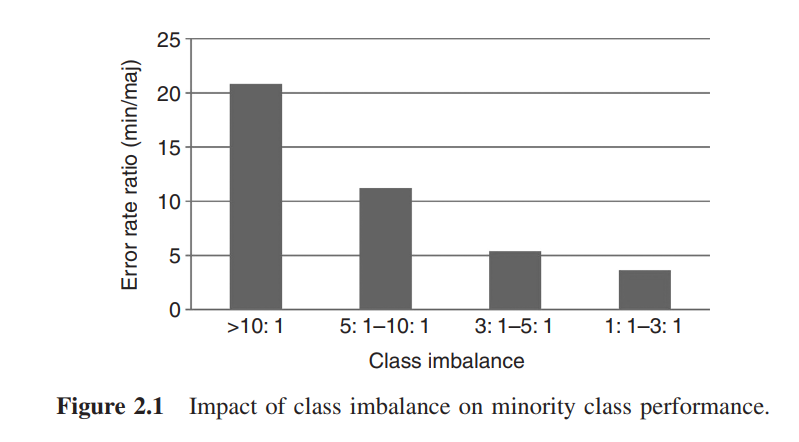

## A metric trap
<p style="font-size:0.8em;"><i>Accuracy paradox</i></p>

Imagine that you have a 99:1 dataset

If your model estimates that all of your dataset has the same value the predominant set:

`Accuracy (ACC):` 99%

> Is this good? Most likely not. The model hasn't learned the interactions between the classes and their features, it simply learned to guess the dominant value

> In fact, most algorithms
are still designed and tested much more thoroughly for accuracy optimization
than for the optimization of other evaluation metrics. This issue is impacted by
the metrics used to guide the heuristic search process. For example, decision trees
are generally formed in a top–down manner and the tree construction process
focuses on selecting the best test condition to expand the extremities of the tree.
The quality of the test condition (i.e., the condition used to split the data at the
node) is usually determined by the “purity” of a split, which is often computed as
the weighted average of the purity values of each branch, where the weights are
determined by the fraction of examples that follow that branch.<br>
> 
><p  style="font-size:0.8em; text-align:right">[4] Weiss, G. M. (2013). Foundations of Imbalanced Learning. (pg. 24)</p> 

## Algorithm level issues

e.g.: Decision Trees

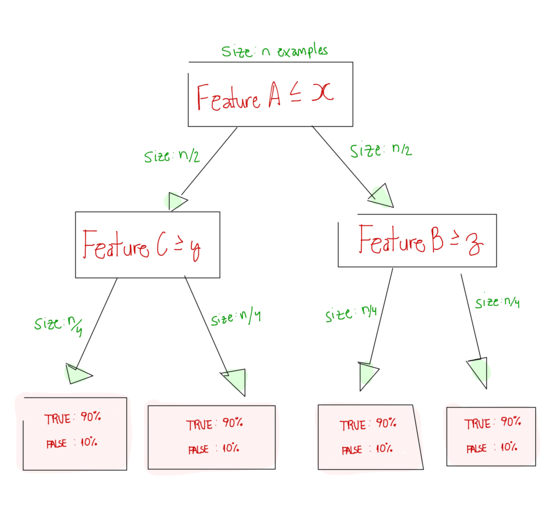

## How to overcome?

1. Problem definition level approaches
2. Data level approaches
3. Algorithm level approaches

## 1. Problem definition level approaches

## Redefine the problem

<br>
Before jumping in more sophisticated approaches, one interest attempt is working with a specific subdomain of interest, rather than the whole dataset, where the relative imbalance is lessened.

> As a simple example, in medical diagnosis, one could restrict the population to people over 90 years of age, especially if the targeted disease tends to be more common in the aged.
>
><p  style="font-size:0.8em; text-align:right">[4] Weiss, G. M. (2013). Foundations of Imbalanced Learning. (pg. 28)</p>

## Use Appropriate Evaluation Metrics

Instead of choosing ACC and relative metrics, utilize metrics that identify the incorrect classification of imbalanced samples

 - Confusion Matrix
 - ROC and AUC
 - Precision and Recall
 - F-measure and the F1-score

## Confusion Matrix

```
                    +------------------+----------+----------+
                    | Predicted/Actual | Positive | Negative |
                    +------------------+----------+----------+
                    | Positive         |    TP    |    FP    |
                    | Negative         |    FN    |    TN    |
                    +------------------+----------+----------+
```

## ROC Curve

$$True\:Positive_{Rate}\:(TPR) = \frac{TP}{FN+TP}$$

$$False\:Positive_{Rate}\:(FPR) = \frac{FP}{FN+TP}$$

Consider in this and in the other definitions that **Positive** is the minor class

## ROC Curve

In [2]:
from IPython.display import IFrame    
frame = IFrame('http://www.navan.name/roc/#slider', width=600, height=555)

In [3]:
frame

By interacting with the slider we are changing the hability of the model to sepate the two analyzed classes

### To get an absolute measure, use the AUC (Area under the curve)

<div>
    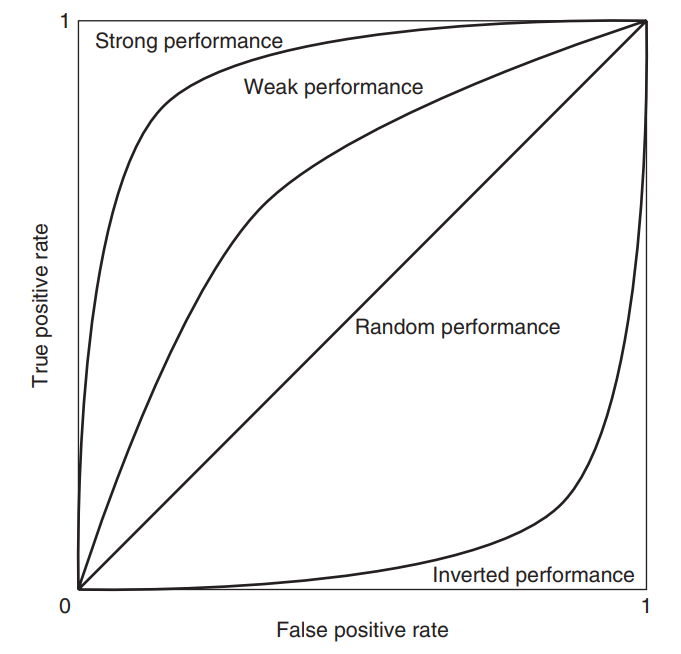
    <br><br><br>
    <p>Values</p>
    <p>1.0 - Perfect</p>
    <p>0.8 - Good</p>
    <p>0.5 - Random</p>
</div>

## Use Appropriate Evaluation Metrics

### Precision and Recall

$$Precision = \frac{TP}{FP+TP}$$

$$Recall = \frac{TP}{FN+TP}$$



Recall correspond to the $True\:Positive_{Rate}\:(TPR)$

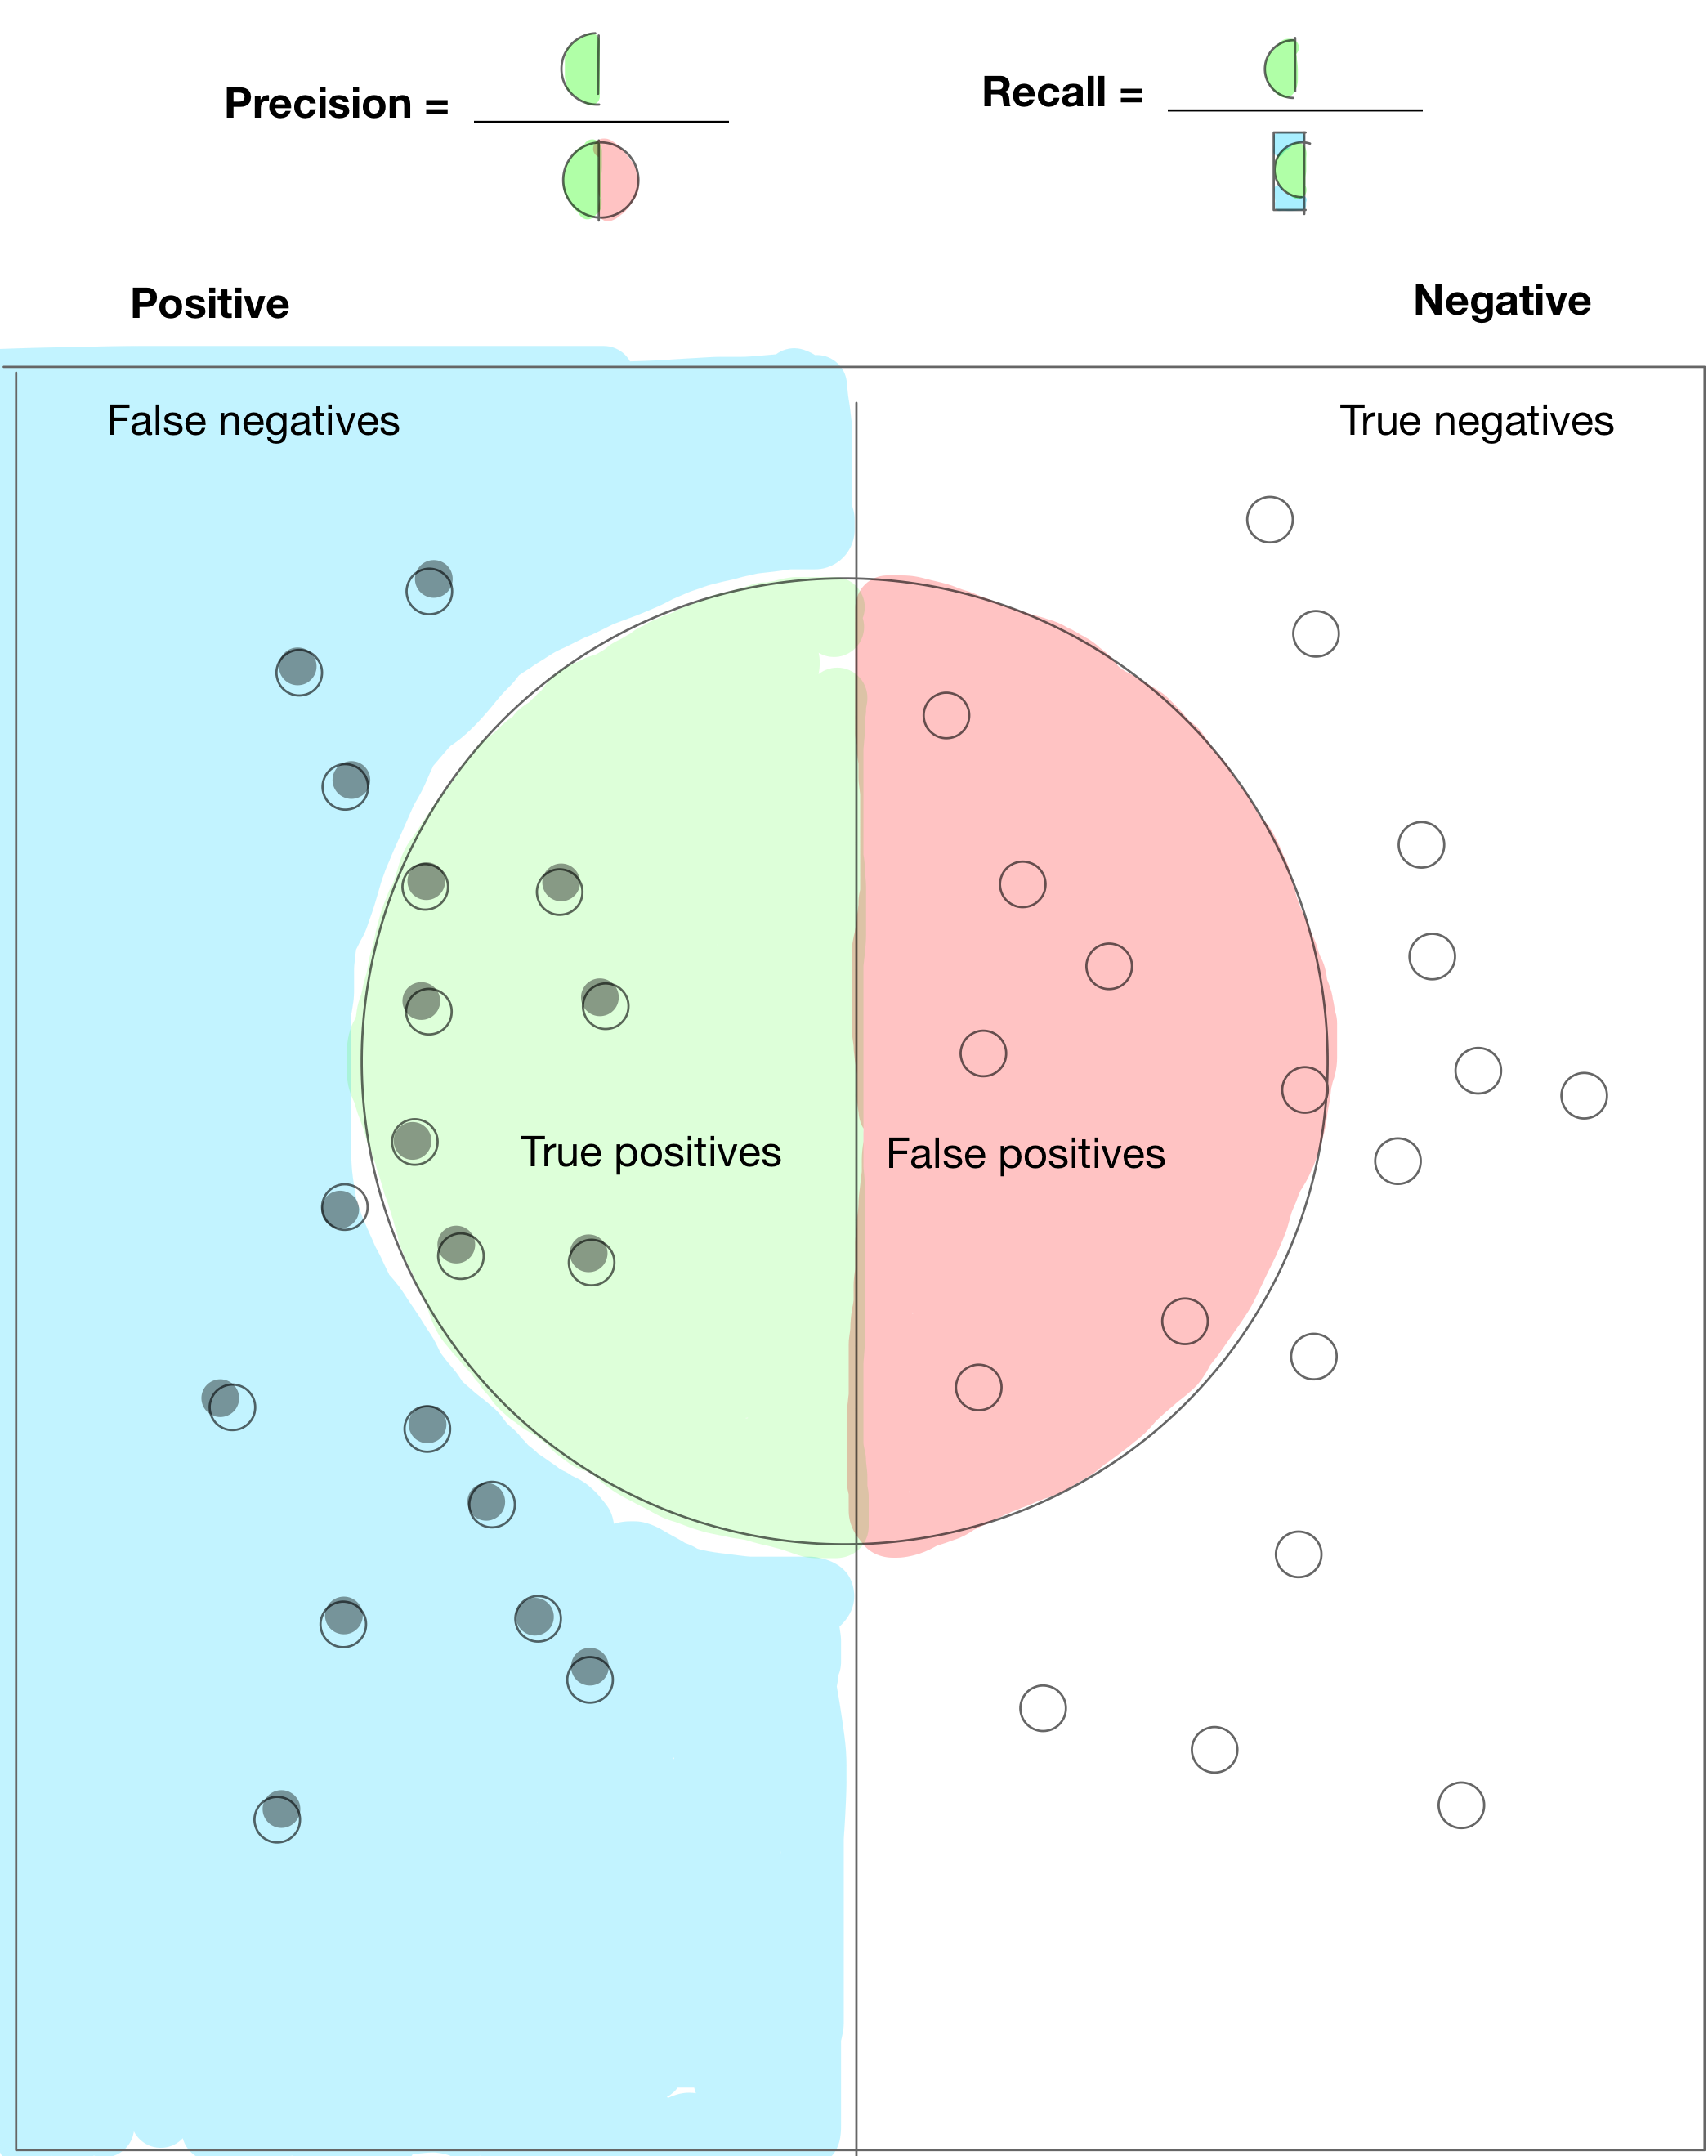

_Precision_ represent how many of the positive predictions correspond to correct ones

<p style="font-size:0.8em;"><b>A perfect Precision</b> means that every positive result estimated by the model engine was relevant (but says nothing about whether all the positive results were identified)</p>

<br>

---



_Recall_ represent how many of the positive class values where correctly predicted

<p style="font-size:0.8em;"><b>A perfect Recall</b> means all positive results were identified by the model (but says nothing about how many of the positive results were incorrect)</p>

One measure might be more important than the other depending on its conjecture.

<br>For instance, in medical diagnostics one might prioritize Recall since is more beneficial to point out all the potential positives that it is to have a precise model but to miss positive results

## F-measure

The F-measure is a harmonic mean of _Precision_ and _Recall_

$$F_\beta = (1+\beta^2)\frac{Precision.Recall}{(\beta^2.Precision)+Recall}$$

When _Precision_ and _Recall_ have the same weight, the metric is name the **F1-Score**

$$F_1 = \frac{2.Precision.Recall}{Precision+Recall}$$

<div style="text-align: right"><a href="https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-unranked-retrieval-sets-1.html#10657">Why a harmonic mean?</a></div>

## 2. Data level approaches

## Sampling Methods
<br>

- Undersampling - applied to the majority class
- Oversampling - applied to the minority class

<br>

Sampling methods are the most common methods for dealing with imbalanced data [4]<br>
These methods are primarily employed to address the problem with relative rarity but do not address the issue of absolute rarity [4].

<p style="text-align: right; font-size:0.8em">[4] Weiss, G. (2013). Foundations of Imbalanced Learning (pg. 36)</p>

## Undersampling
<br>

1. **[Random undersampling][1]:** random elimination of the predominant class, equalizing the class proportion;

[1]: http://conteudo.icmc.usp.br/pessoas/gbatista/files/ifip2008.pdf


2. **[K-means undersampling][2]:** separate the predominant label in classes and remove from those the redudant examples;


[2]: https://www.researchgate.net/publication/271913184_Undersampled_K_K_-means_approach_for_handling_imbalanced_distributed_data

3. **[Tomek links][3]:** calculate the distance between two values in different classes. If the distance is the smallest between one element of this pair and any other data point from a different class, the pair is a Tomek link. In a Tomek link is safe to assume that one of the pair is either noise or the pair is at the borderline. As a undersampling technique the Tomek link technique removes the value that belongs to the majority class;
<br><br>
<p  style='text-align: right; font-size: 0.8em'>More techniques described in <a href=http://conteudo.icmc.usp.br/pessoas/gbatista/files/iicai2009.pdf>[5] PRATI, BATISTA and MONARD. 2009</a></p>

[3]: http://conteudo.icmc.usp.br/pessoas/gbatista/files/iicai2009.pdf

On the other hand, random under-sampling can eventually discard data potentially important for learning.

## Oversampling

1. **[Random oversampling][1]:** is a non-heuristic method that aims to balance class distribution through the random replication of minority class examples
 
[1]: http://conteudo.icmc.usp.br/pessoas/gbatista/files/ifip2008.pdf

2. **[SMOTE][2]:** _Synthetic Minority Over-sampling Technique_: the minority class is segmented using a _K-means_ algorithm. New minority samples are generated based on the difference between data a point and a few of its nearest neighbors based one the balance proportion desired. This difference is applied to each feature of the data points and are multiplied by a random number ranging from 0-1. These values are then summed to the selected data point to generate e new syntetic observation


[2]: https://jair.org/index.php/jair/article/view/10302/24590


3. **[ADASYN][3]:** _Adaptive Synthetic_ Sampling Approach: uses K nearest neighbors to identify the minority class data points that are more difficult to learn (those covered with a dense majority neighborhood), the algorithm then creates the number of synthetic examples accordingly, also using the K-nearest neighbors to combine a data point with another close minority example
<br><br>
 
<p  style='text-align: right; font-size:0.8em'>More techniques described in <a href=http://conteudo.icmc.usp.br/pessoas/gbatista/files/iicai2009.pdf>[5] PRATI, BATISTA and MONARD. 2009</a></p>

[3]: https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf

## 3. Algorithm level approaches

## Cost sensitive learning

Cost sensitive learning produces different weights in the classification task. By shifting the probability threshold to higher or lower values one can amplify or attenuate the determination of a particular class.

This is usually done, in algorithms like Relabeling, using the ratio of false predictions in the training set:

$$p = \frac{FP}{FP+FN}$$

The probability threshold is then used in the test model to guarantee that only results equal or greater than this probability

<p style="font-size: 0.8em; text-align:right">[6] LING, C. X., SHENG, V. S. (2008). Cost-Sensitive Learning and the Class Imbalance Problem</p>

## Emsemble methods

Ensemble methods aim to leverage the classification power of multiple base learners (learned on different subsets of the training data) to improve on the classification performance over traditional classification algorithms.

>Under an average error rate of less than 50% and the probability of misprediction of each classifier being independent of the others, the expected error rate of an instance goes to zero as the number of classifiers goes to infinity.
><p style="text-align: right; font-size: 0.8em">[7] Hansen, L. K. & Salamon P. (1990) Neural network ensembles</p>

<br>

**[Boosting][1]**: Create subsets of the training data, train one model and use the whole set to evaluate the model. Increase the sampling probability of the data points in which the model didn't perform as well and repeat the process for different models (e.g. AdaBoost, XGBoost)

[1]: https://www.youtube.com/watch?v=GM3CDQfQ4sw

**[Bagging][2]**: Generate several subsamples and train different models subsquently (e.g. ScikitLearn's Bagging Classifier)

[2]: https://www.youtube.com/watch?v=2Mg8QD0F1dQ

Many ensemble methods have been combined with sampling strategies to create ensemble methods that are more suitable for dealing with class imbalance (e.g. AdaBoost + SMOTE = SMOTEBoost)

## Example <br><br>
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/McKinsey-hackathon.jpg">

## Wrap up

1. Identify the imbalanced proportion and analyze the relationship between features and target;
2. Use the correct metrics and segment the problem when possible;
3. Start small (one technique at a time), preferably using the easier ones first;
4. If the problem requires, use an ensemble of methods to derive the result, but be carefull with explainability and performance;
5. Always validate the model.